In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
axis_z = np.linspace(0, 6, 61)
axis_ebv = np.arange(1)
axis_red = np.array(['Calzetti'])
axis_sed = np.array(['sed1', 'sed2', 'sed3'])
axis_scale = np.arange(1, 11)

pdf = np.zeros((len(axis_z), len(axis_ebv), len(axis_red), len(axis_sed), len(axis_scale)))
pdf.shape, pdf.size

((61, 1, 1, 3, 10), 1830)

In [4]:
sed_probs = [0.6, 0.3, 0.1]
for i in range(len(axis_sed)):
    pdf[:,0,0,i,:] = norm.pdf(axis_z, loc=i*1.5)[:,np.newaxis] * sed_probs[i] * norm.pdf(axis_scale, loc=10//(i+1))

In [5]:
pdf /= pdf.sum()

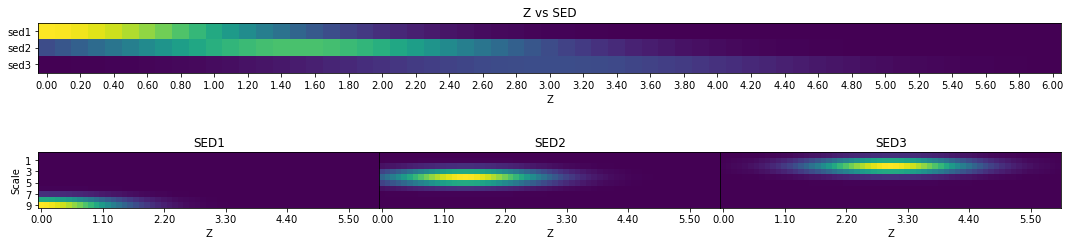

In [6]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(2, 3, wspace=0)

# SED marginal
ax0 = fig.add_subplot(gs[0,:])
ax0.imshow(pdf.sum(axis=-1).reshape(61, 3).T)
ax0.set_yticks([0,1,2])
ax0.set_yticklabels(['sed1', 'sed2', 'sed3'])
ax0.set_xticks(np.arange(len(axis_z))[::2])
ax0.set_xticklabels([f'{z:.2f}' for z in axis_z[::2]])
ax0.set_xlabel('Z')
ax0.set_title('Z vs SED')

# SED0 scale
ax1 = fig.add_subplot(gs[1,0])
ax1.imshow(pdf[:,0,0,0,:].reshape(61, 10).T)
ax1.set_title('SED1')

# SED1 scale
ax2 = fig.add_subplot(gs[1,1])
ax2.imshow(pdf[:,0,0,1,:].reshape(61, 10).T)
ax2.set_title('SED2')

# SED2 scale
ax3 = fig.add_subplot(gs[1,2])
ax3.imshow(pdf[:,0,0,2,:].reshape(61, 10).T)
ax3.set_title('SED3')

# Labels
for ax in [ax1, ax2, ax3]:
    ax.set_yticks([])
    ax.set_xlabel('Z')
    ax.set_xticks(np.arange(len(axis_z))[::11])
    ax.set_xticklabels([f'{z:.2f}' for z in axis_z[::11]])
ax1.set_yticks(axis_scale[::2])
ax1.set_ylabel('Scale')

plt.tight_layout()
plt.show()

fig.savefig('/home/aalvarez/Work/Projects/Alexandria/Alexandria/MathUtils/auxdir/MathUtils/Grid_TEST_vector.png')

In [13]:
with open('/home/aalvarez/Work/Projects/Alexandria/Alexandria/MathUtils/auxdir/MathUtils/Grid_TEST_vector.txt', 'wt') as fd:
    print(r'''22 serialization::archive 18 0 1 0
0 0 0 2 1 0
1 3 SED 3 3 1 0
2 0 0 1 0 8 CosmosSp 8 new_name 3
3 1 0 8 CosmosSp 6 Sa_A_0 3
4 1 0 8 CosmosSp 6 Sa_A_1 2
5 15 Reddening Curve 1 3
6 0 0 11 SB_calzetti 5 1 0
7 6 E(B-V) 1 0.00000000000000000e+00 5
8 1 Z 61 0.00000000000000000e+00 1.00000000000000006e-01 2.00000000000000011e-01 2.99999999999999989e-01 4.00000000000000022e-01 5.00000000000000000e-01 5.99999999999999978e-01 6.99999999999999956e-01 8.00000000000000044e-01 9.00000000000000022e-01 1.00000000000000000e+00 1.10000000000000009e+00 1.19999999999999996e+00 1.30000000000000004e+00 1.39999999999999991e+00 1.50000000000000000e+00 1.60000000000000009e+00 1.69999999999999996e+00 1.80000000000000004e+00 1.89999999999999991e+00 2.00000000000000000e+00 2.10000000000000009e+00 2.20000000000000018e+00 2.29999999999999982e+00 2.39999999999999991e+00 2.50000000000000000e+00 2.60000000000000009e+00 2.70000000000000018e+00 2.79999999999999982e+00 2.89999999999999991e+00 3.00000000000000000e+00 3.10000000000000009e+00 3.20000000000000018e+00 3.29999999999999982e+00 3.39999999999999991e+00 3.50000000000000000e+00 3.60000000000000009e+00 3.70000000000000018e+00 3.79999999999999982e+00 3.89999999999999991e+00 4.00000000000000000e+00 4.09999999999999964e+00 4.20000000000000018e+00 4.29999999999999982e+00 4.40000000000000036e+00 4.50000000000000000e+00 4.59999999999999964e+00 4.70000000000000018e+00 4.79999999999999982e+00 4.90000000000000036e+00 5.00000000000000000e+00 5.09999999999999964e+00 5.20000000000000018e+00 5.29999999999999982e+00 5.40000000000000036e+00 5.50000000000000000e+00 5.59999999999999964e+00 5.70000000000000018e+00 5.79999999999999982e+00 5.90000000000000036e+00 6.00000000000000000e+00''', end=' ', file=fd)
    for ised in range(len(axis_sed)):
        for iz in range(len(axis_z)):
            print(10, 0, *pdf[iz,0,0,ised,:].ravel() ,end=' ', file=fd)

In [8]:
pdf.sum(axis=-1).sum(axis=0)

array([[[0.36406416, 0.47023721, 0.16569862]]])

In [9]:
np.average(axis_scale, weights=pdf[:,0,0,0].sum(axis=0))

9.47990564370468

In [10]:
0.36/0.17

2.117647058823529

<BarContainer object of 10 artists>

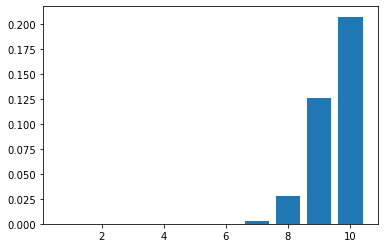

In [11]:
plt.bar(axis_scale, pdf[:,0,0,0].sum(axis=0))